In [1]:
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
import warnings


df=pd.read_excel("C:\\Users\\Ayush\\Downloads\\Data_Train (1).xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [2]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.shape

(10683, 11)

In [4]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [7]:
for i in df.columns:
    print(i,'-----------------',df[i].unique())

Airline ----------------- ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Date_of_Journey ----------------- ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
Source ----------------- ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination ----------------- ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Route ------

In [8]:
# make Delhi to new delhi or new delhi

In [9]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [10]:
df['Route'].mode()

0    DEL → BOM → COK
Name: Route, dtype: object

In [11]:
df['Total_Stops'].fillna(df['Total_Stops'].mode()[0],inplace=True)

In [12]:
df['Route'].fillna(df['Route'].mode()[0],inplace=True)

In [13]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [14]:
df['Destination']=df['Destination'].replace('New Delhi','Delhi')

In [15]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [16]:
df["Date_of_Journey"]=pd.to_datetime(df["Date_of_Journey"])
df["Dep_Time"]=pd.to_datetime(df["Dep_Time"])
df["Arrival_Time"]=pd.to_datetime(df["Arrival_Time"])



C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specif

In [17]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,2022-12-16 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-12-16 05:50:00,2022-12-16 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-12-16 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-12-16 18:05:00,2022-12-16 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,2022-12-16 16:50:00,2022-12-16 21:35:00,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2022-12-16 19:55:00,2022-12-16 22:25:00,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2022-12-16 20:45:00,2022-12-16 23:20:00,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2022-12-16 08:20:00,2022-12-16 11:20:00,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,Delhi,BLR → DEL,2022-12-16 11:30:00,2022-12-16 14:10:00,2h 40m,non-stop,No info,12648


In [18]:

# Extracting  day 
df["day_of_journey"] = df["Date_of_Journey"].dt.day

# Extracting month
df["month_of_journey"] = df["Date_of_Journey"].dt.month

## Extracting  departure Hours
df["Dep_hour"] = df["Dep_Time"].dt.hour

# Extracting departure Minutes
df["Dep_min"] = df["Dep_Time"].dt.minute

## Extracting  arrival Hours
df["arrival_hour"] = df["Arrival_Time"].dt.hour

# Extracting arrival Minutes
df["arrival_min"] = df["Arrival_Time"].dt.minute



In [19]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,2022-12-16 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-12-16 05:50:00,2022-12-16 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-12-16 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-12-16 18:05:00,2022-12-16 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,2022-12-16 16:50:00,2022-12-16 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [20]:
df.dtypes

Airline                     object
Date_of_Journey     datetime64[ns]
Source                      object
Destination                 object
Route                       object
Dep_Time            datetime64[ns]
Arrival_Time        datetime64[ns]
Duration                    object
Total_Stops                 object
Additional_Info             object
Price                        int64
day_of_journey               int64
month_of_journey             int64
Dep_hour                     int64
Dep_min                      int64
arrival_hour                 int64
arrival_min                  int64
dtype: object

In [21]:
df.drop(columns=['Dep_Time','Arrival_Time','Date_of_Journey'],inplace=True)

In [22]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,11,30,14,10


# EVAL
eval('2+5')

In [23]:
df['Duration']=df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [24]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,150,non-stop,No info,4107,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,155,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,180,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,Delhi,BLR → DEL,160,non-stop,No info,12648,3,1,11,30,14,10


In [25]:
df.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)


In [26]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,Delhi,BLR → DEL,170,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,285,1,No info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,150,0,No info,4107,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,155,0,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,180,0,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,Delhi,BLR → DEL,160,0,No info,12648,3,1,11,30,14,10


In [27]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,Delhi,BLR → DEL,170,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,285,1,No info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,150,0,No info,4107,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,155,0,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,180,0,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,Delhi,BLR → DEL,160,0,No info,12648,3,1,11,30,14,10


In [28]:
df.corr()

,Duration,Total_Stops,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
Duration,1.000000,0.738025,0.506371,-0.038480,0.055152,0.002001,-0.018938,0.051434,-0.069653
Total_Stops,0.738025,1.000000,0.603883,-0.024156,0.065498,-0.061490,-0.002591,0.038123,-0.106939
Price,0.506371,0.603883,1.000000,-0.165412,0.010700,0.006819,-0.024492,0.024264,-0.086155
day_of_journey,-0.038480,-0.024156,-0.165412,1.000000,-0.264899,-0.002251,-0.016521,-0.002124,-0.021424
month_of_journey,0.055152,0.065498,0.010700,-0.264899,1.000000,0.028180,0.002152,-0.004338,-0.025786
Dep_hour,0.002001,-0.061490,0.006819,-0.002251,0.028180,1.000000,-0.024806,0.005215,0.067909
Dep_min,-0.018938,-0.002591,-0.024492,-0.016521,0.002152,-0.024806,1.000000,0.043054,-0.017594
arrival_hour,0.051434,0.038123,0.024264,-0.002124,-0.004338,0.005215,0.043054,1.000000,-0.154362
arrival_min,-0.069653,-0.106939,-0.086155,-0.021424,-0.025786,0.067909,-0.017594,-0.154362,1.000000


<AxesSubplot:>

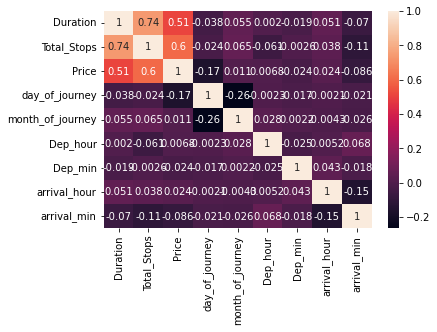

In [29]:
# as the no of stop increse 
sns.heatmap(df.corr(),annot=True)

In [30]:
# total stops and durations and related to the price

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,10683.0,643.093232,507.862001,5.0,170.0,520.0,930.0,2860.0
Total_Stops,10683.0,0.824207,0.675199,0.0,0.0,1.0,1.0,4.0
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0
day_of_journey,10683.0,12.682205,8.803701,3.0,5.0,6.0,21.0,27.0
month_of_journey,10683.0,5.534775,2.987489,1.0,3.0,5.0,6.0,12.0
Dep_hour,10683.0,12.490686,5.748650,0.0,8.0,11.0,18.0,23.0
Dep_min,10683.0,24.411214,18.767980,0.0,5.0,25.0,40.0,55.0
arrival_hour,10683.0,13.348778,6.859125,0.0,8.0,14.0,19.0,23.0
arrival_min,10683.0,24.690630,16.506036,0.0,10.0,25.0,35.0,55.0


In [32]:
df['Duration'].unique()

array([ 170,  445, 1140,  325,  285,  145,  930, 1265, 1530,  470,  795,
        155,  135,  730, 1595,  270, 1355, 1380, 1235,  310,  920,  175,
        800,  910,  345,  355,  805, 1320,  330,  625,  315,  150,  375,
        715,  665,  510, 1325,  165,  720,  965, 1195,  195, 1520,  180,
        975,  905,  390, 1505,  745, 1640,  615,  630,   90,   85, 1590,
        440,  810,  300, 1145,  890,  160, 1330,  575,  600, 1280, 1125,
        740, 1080,  555, 1050,  995,  735,  450, 1440,  535,  430,  870,
       1820,  900,  765,  610,  925,  845, 1215, 1390, 1090,  960,  140,
        480, 1015,  190,  840, 1430, 1300, 1275,  650,  495,  515,  710,
       1655,  505, 1255,  290,  490, 1465, 1415, 1545, 1570, 1730, 1515,
        560,  550,  185,  690,  570, 1055,  305, 1550, 1200,  780, 1105,
       1450,  295, 1535,  380, 1120, 1165, 1760,  545,  645,  700, 1375,
       2245, 1540,  835,  520, 1410,  755, 1455,   80,  660,  675,  875,
        775,  540,  460,  705, 1495, 1025, 1795, 13

In [33]:
x=df[(df['Source']=='Mumbai')&(df['Destination']=='Hyderabad')&(df["Total_Stops"]==2)]
x['Duration'].mode()

0     255
1     560
2     710
3    1795
4    2245
Name: Duration, dtype: int64

In [34]:
x.Duration.mean()

1101.3333333333333

In [35]:
round(x['Duration'].mean(),2)

1101.33

In [36]:
df['Duration'].iloc[6474]=round(x['Duration'].mean(),2)

C:\Users\Ayush\AppData\Local\Temp\ipykernel_25460\760447470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration'].iloc[6474]=round(x['Duration'].mean(),2)


In [37]:
df.iloc[6474]

Airline                         Air India
Source                             Mumbai
Destination                     Hyderabad
Route               BOM → GOI → PNQ → HYD
Duration                          1101.33
Total_Stops                             2
Additional_Info                   No info
Price                               17327
day_of_journey                          3
month_of_journey                        6
Dep_hour                               16
Dep_min                                50
arrival_hour                           16
arrival_min                            55
Name: 6474, dtype: object

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,10683.0,643.195856,507.843817,75.0,170.0,520.0,930.0,2860.0
Total_Stops,10683.0,0.824207,0.675199,0.0,0.0,1.0,1.0,4.0
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0
day_of_journey,10683.0,12.682205,8.803701,3.0,5.0,6.0,21.0,27.0
month_of_journey,10683.0,5.534775,2.987489,1.0,3.0,5.0,6.0,12.0
Dep_hour,10683.0,12.490686,5.748650,0.0,8.0,11.0,18.0,23.0
Dep_min,10683.0,24.411214,18.767980,0.0,5.0,25.0,40.0,55.0
arrival_hour,10683.0,13.348778,6.859125,0.0,8.0,14.0,19.0,23.0
arrival_min,10683.0,24.690630,16.506036,0.0,10.0,25.0,35.0,55.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

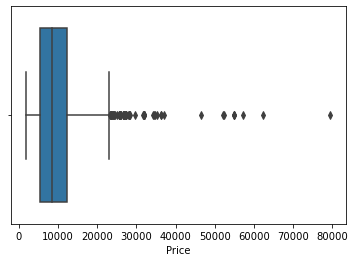

In [39]:
# most of the flight have flilgts 5k to 8k
sns.boxplot(df['Price'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


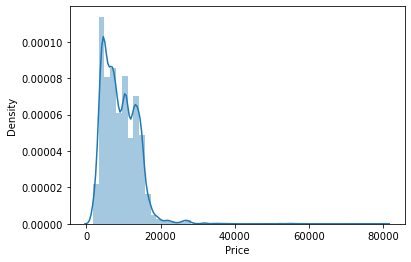

In [40]:
sns.distplot(df['Price']);

In [41]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='count'>

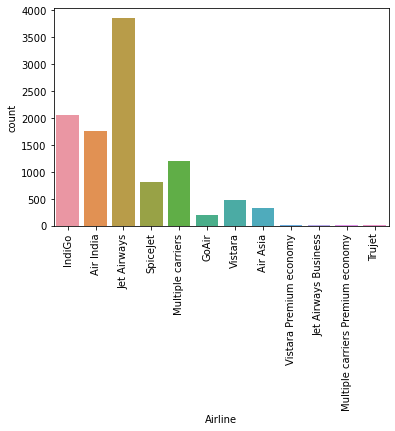

In [42]:
plt.xticks(rotation=90)
sns.countplot(x='Airline',data=df)

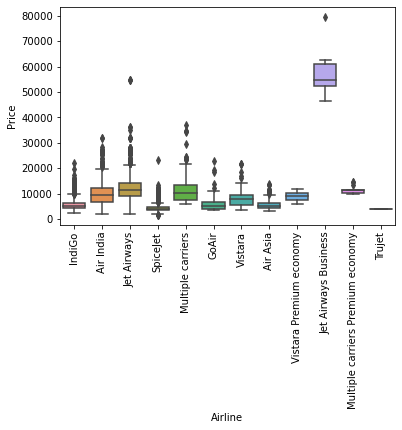

In [43]:
sns.boxplot(x='Airline',y='Price',data=df)
plt.xticks(rotation=90);

In [44]:
df[df['Airline']=='Jet Airways Business']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
657,Jet Airways Business,Banglore,Delhi,BLR → BOM → DEL,300.0,1,No info,52229,3,1,5,45,10,45
2924,Jet Airways Business,Banglore,Delhi,BLR → BOM → DEL,340.0,1,Business class,79512,3,1,5,45,11,25
5372,Jet Airways Business,Banglore,Delhi,BLR → BOM → DEL,400.0,1,Business class,62427,3,1,5,45,12,25
7351,Jet Airways Business,Delhi,Cochin,DEL → ATQ → BOM → COK,500.0,2,No info,46490,3,3,20,5,4,25
9715,Jet Airways Business,Delhi,Cochin,DEL → ATQ → BOM → COK,500.0,2,No info,52285,3,6,20,5,4,25
10364,Jet Airways Business,Banglore,Delhi,BLR → MAA → DEL,280.0,1,Business class,57209,3,1,9,45,14,25


In [45]:
df[df['Airline']=='Trujet']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
2878,Trujet,Mumbai,Hyderabad,BOM → NDC → HYD,195.0,1,No info,4140,3,6,13,5,16,20


In [46]:
df['Total_Stops'].value_counts()

1    5626
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [47]:
df[df['Total_Stops']==4]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day_of_journey,month_of_journey,Dep_hour,Dep_min,arrival_hour,arrival_min
9182,Air India,Banglore,Delhi,BLR → CCU → BBI → HYD → VGA → DEL,1770.0,4,Change airports,17686,3,1,5,50,11,20


In [48]:
# Find the flights with respect no of stopages

In [49]:
# 
df.groupby('Total_Stops')['Airline'].value_counts()

Total_Stops  Airline                          
0            IndiGo                               1241
             SpiceJet                              670
             Jet Airways                           623
             Air India                             417
             Vistara                               264
             Air Asia                              181
             GoAir                                  92
             Vistara Premium economy                 3
1            Jet Airways                          2535
             Multiple carriers                    1145
             IndiGo                                793
             Air India                             541
             Vistara                               215
             SpiceJet                              148
             Air Asia                              129
             GoAir                                 102
             Multiple carriers Premium economy      13
             Jet A

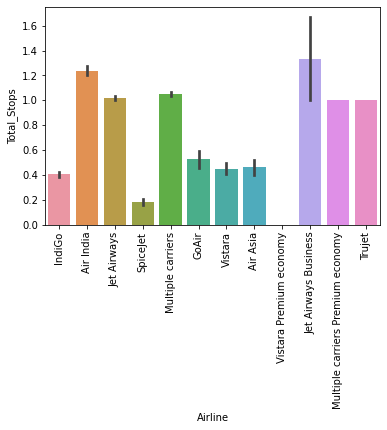

In [50]:
sns.barplot(x='Airline',y='Total_Stops',data=df)
plt.xticks(rotation=90);

<AxesSubplot:xlabel='Airline', ylabel='Total_Stops'>

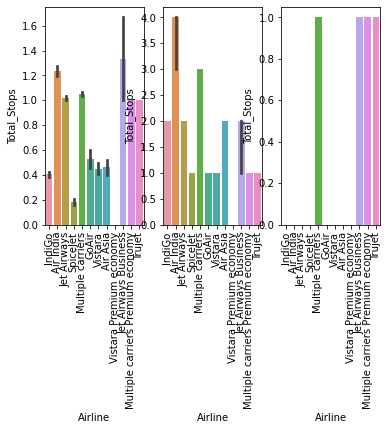

In [51]:
plt.subplot(1,3,1)
plt.xticks(rotation=90);

sns.barplot(x='Airline',y='Total_Stops',data=df)
plt.subplot(1,3,2)
plt.xticks(rotation=90);

sns.barplot(x='Airline',y='Total_Stops',data=df,estimator=max)
plt.subplot(1,3,3)
plt.xticks(rotation=90);

sns.barplot(x='Airline',y='Total_Stops',data=df,estimator=min)
            

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

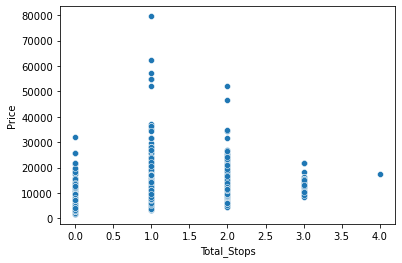

In [52]:
sns.scatterplot(x='Total_Stops',y='Price',data=df)

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

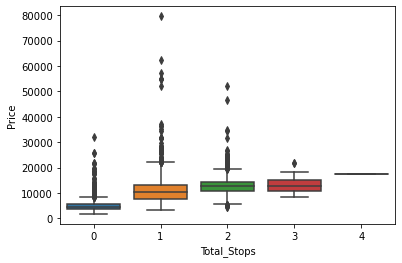

In [53]:
sns.boxplot(x='Total_Stops',y='Price',data=df)

In [54]:
# Which flights is available from source  to destination
df.groupby(['Source','Destination'])['Airline'].value_counts()

Source    Destination  Airline                          
Banglore  Delhi        Jet Airways                           788
                       IndiGo                                523
                       Air India                             332
                       Vistara                               185
                       SpiceJet                              181
                       GoAir                                  93
                       Air Asia                               89
                       Jet Airways Business                    4
                       Vistara Premium economy                 2
Chennai   Kolkata      IndiGo                                184
                       SpiceJet                              128
                       Vistara                                43
                       Air India                              25
                       Vistara Premium economy                 1
Delhi     Cochin       Jet Airway

In [55]:
# Find max and min of avreg from source to destination

In [56]:
# Which flights is available from source  to destination

k=df.groupby(['Source','Destination','Airline'])['Price'].agg(['max','min','mean'])
k.reset_index(inplace=True)
k.head(9)

,Source,Destination,Airline,max,min,mean
0,Banglore,Delhi,Air Asia,10873,3383,4574.280899
1,Banglore,Delhi,Air India,31783,3758,9238.198795
2,Banglore,Delhi,GoAir,18558,3398,4948.881720
3,Banglore,Delhi,IndiGo,22153,3359,5274.112811
4,Banglore,Delhi,Jet Airways,54826,3359,11021.732234
5,Banglore,Delhi,Jet Airways Business,79512,52229,62844.250000
6,Banglore,Delhi,SpiceJet,23267,3257,4550.292818
7,Banglore,Delhi,Vistara,21730,4353,6182.172973
8,Banglore,Delhi,Vistara Premium economy,11793,5969,8881.000000


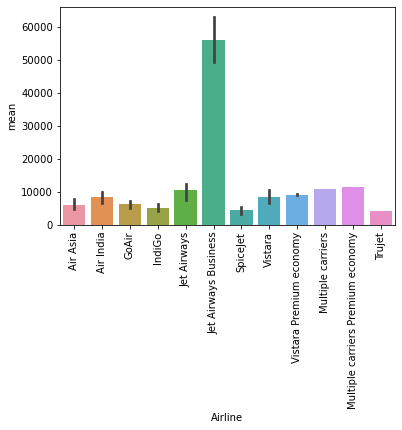

In [57]:
sns.barplot(x=k['Airline'],y=k['mean'],data=k)
plt.xticks(rotation=90);




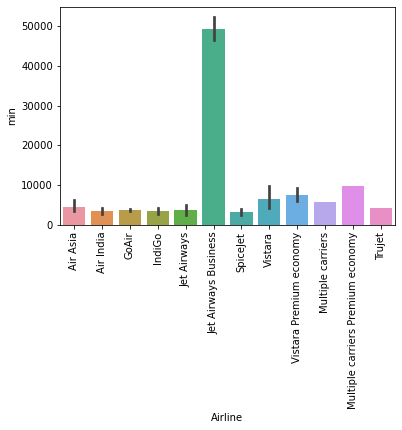

In [58]:
sns.barplot(x=k['Airline'],y=k['min'],data=k)
plt.xticks(rotation=90);


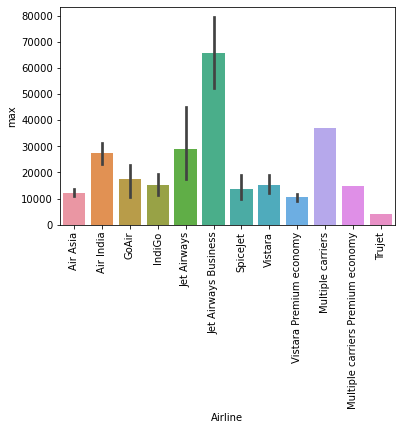

In [59]:
sns.barplot(x=k['Airline'],y=k['max'],data=k)
plt.xticks(rotation=90);

<Figure size 576x648 with 0 Axes>

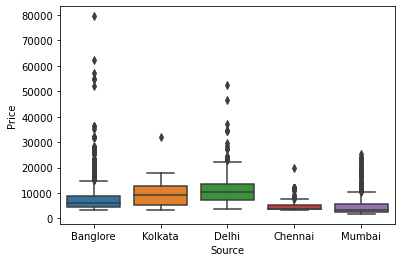

<Figure size 576x648 with 0 Axes>

In [60]:
sns.boxplot(x='Source',y='Price',data=df)
plt.figure(figsize=(8,9))

<AxesSubplot:xlabel='Destination', ylabel='Price'>

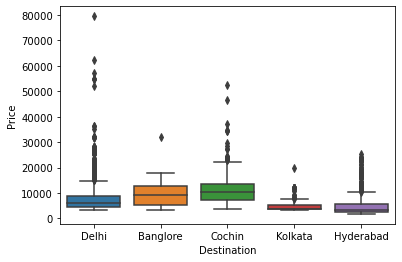

In [61]:
sns.boxplot(x='Destination',y='Price',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month_of_journey', ylabel='count'>

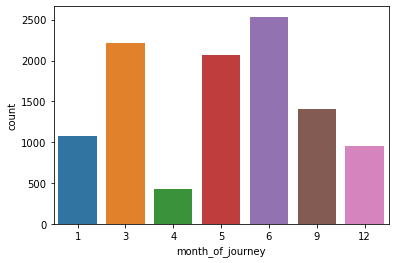

In [62]:
# june was the peak season
sns.countplot(df['month_of_journey'],data=df)

<AxesSubplot:xlabel='month_of_journey', ylabel='Price'>

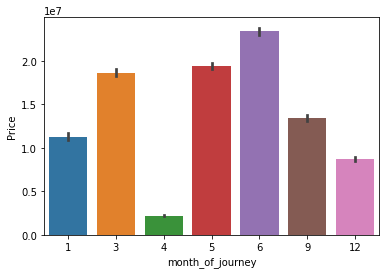

In [63]:
sns.barplot(x='month_of_journey',y='Price',data=df,estimator=sum)

In [64]:
# Which flights take of in which month

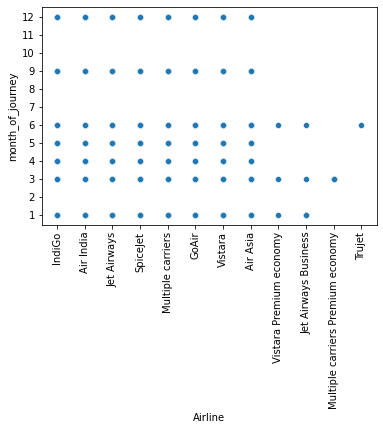

In [65]:
sns.scatterplot(x='Airline',y='month_of_journey',data=df)
plt.xticks(rotation=90);
plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12]);


In [66]:
# how many flights take off in each month

In [67]:
df.groupby('month_of_journey')['Airline'].value_counts()

month_of_journey  Airline          
1                 Jet Airways          430
                  Air India            197
                  IndiGo               184
                  SpiceJet              76
                  Multiple carriers     75
                                      ... 
12                Multiple carriers     65
                  SpiceJet              54
                  Vistara               52
                  Air Asia              29
                  GoAir                 12
Name: Airline, Length: 64, dtype: int64

In [68]:
# How price varies with month

<AxesSubplot:xlabel='month_of_journey', ylabel='Price'>

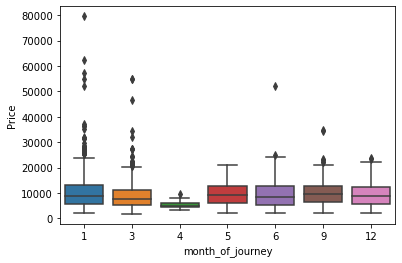

In [69]:
sns.boxplot(x='month_of_journey',y='Price',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day_of_journey', ylabel='count'>

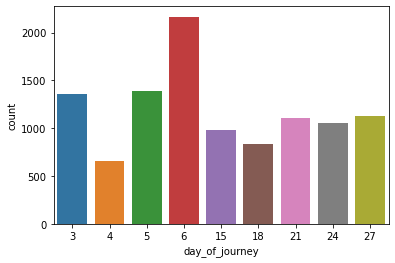

In [70]:
sns.countplot(df['day_of_journey'],data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day_of_journey', ylabel='Price'>

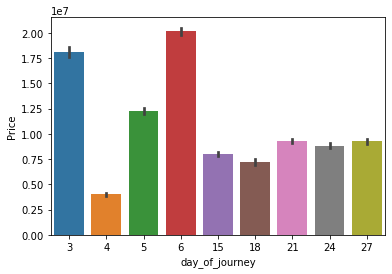

In [71]:
sns.barplot(df['day_of_journey'],df['Price'],data=df,estimator=sum)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day_of_journey', ylabel='Price'>

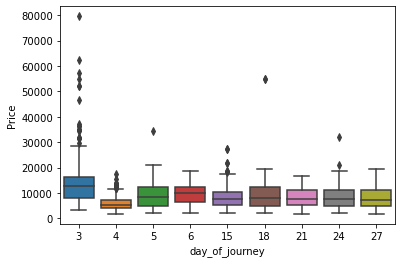

In [72]:
sns.boxplot(df['day_of_journey'],df['Price'],data=df)

In [73]:
# wht was the peak deprture time

In [74]:
df['Dep_hour'].value_counts()

9     916
7     867
8     697
17    695
6     687
20    651
5     629
11    580
19    567
10    536
14    523
21    492
16    472
18    444
13    417
22    387
15    319
2     194
12    178
4     170
23    161
0      40
1      37
3      24
Name: Dep_hour, dtype: int64

In [75]:
# Find out the each departure 

In [76]:
df.groupby('Airline')['Dep_hour'].value_counts()

Airline                  Dep_hour
Air Asia                 7           53
                         22          39
                         19          37
                         16          33
                         23          33
                                     ..
Vistara                  10           1
                         12           1
Vistara Premium economy  7            1
                         11           1
                         16           1
Name: Dep_hour, Length: 149, dtype: int64

In [77]:
df.groupby(['Airline','Source'])['Dep_hour'].value_counts()

Airline                  Source    Dep_hour
Air Asia                 Banglore  23          33
                                   11          24
                                   4           23
                                   5            9
                         Delhi     16          33
                                               ..
Vistara                  Mumbai    14           1
                                   19           1
Vistara Premium economy  Banglore  11           1
                                   16           1
                         Chennai   7            1
Name: Dep_hour, Length: 308, dtype: int64

In [78]:
df.groupby('Airline')['arrival_hour'].value_counts()

Airline                  arrival_hour
Air Asia                 22              63
                         7               52
                         13              36
                         2               33
                         1               30
                                         ..
Vistara                  16               5
                         21               3
Vistara Premium economy  9                1
                         14               1
                         18               1
Name: arrival_hour, Length: 144, dtype: int64

In [79]:
df.groupby(['Airline','Destination'])['arrival_hour'].value_counts()

Airline                  Destination  arrival_hour
Air Asia                 Banglore     22              34
                                      1               30
                                      12              30
                                      23              24
                                      10              21
                                                      ..
Vistara                  Kolkata      20              18
                                      10               1
Vistara Premium economy  Delhi        14               1
                                      18               1
                         Kolkata      9                1
Name: arrival_hour, Length: 279, dtype: int64